<a href="https://colab.research.google.com/github/doyoung1122/24-2/blob/Introduction-of-A.I/Intro_AI_clustering_w_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

data1 = np.random.normal(loc=[0, 0], scale=[1.0, 2.5], size=(100, 2))
data2 = np.random.normal(loc=[5, 5], scale=[1.0, 0.7], size=(100, 2))
data3 = np.random.normal(loc=[10, 0], scale=[0.5, 2.2], size=(100, 2))

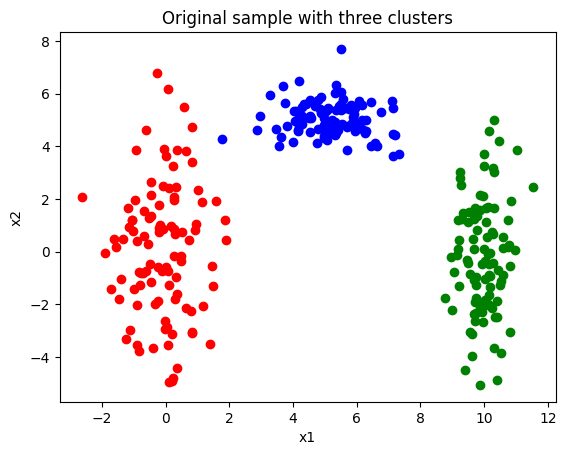

In [ ]:
plt.scatter(data1[:,0], data1[:,1], color='red')
plt.scatter(data2[:,0], data2[:,1], color='blue')
plt.scatter(data3[:,0], data3[:,1], color='green')
plt.title("Original sample with three clusters")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [ ]:
data = np.concatenate((data1, data2, data3), axis=0)
np.random.shuffle(data)

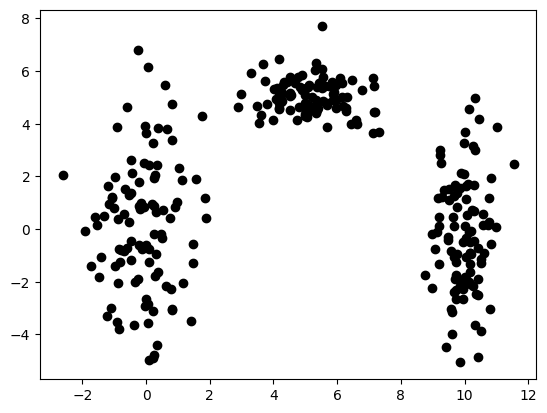

In [ ]:
plt.scatter(data[:,0], data[:,1],color='black')
plt.show()

In [ ]:
k = 3 # number of centers

n_samples, n_features = data.shape

centroids = np.array([[0,0],[3,0],[6,0]]) # initial centroids
# This is more efficient way
#centroids = data[np.random.choice(n_samples, k, replace=False)] # select k centroids (중심) from origianl sample

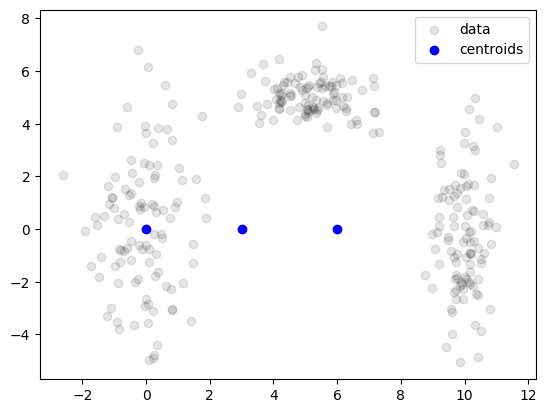

In [ ]:
plt.scatter(data[:,0], data[:,1],color='black', label = 'data', alpha=0.1)
plt.scatter(centroids[:,0], centroids[:,1], color='blue', label = 'centroids')
plt.legend()
plt.show()

To update the cluster centroids, follow these three steps:

In [ ]:
# Step1: We first measure the distance between data and the first centroid
print((data - centroids[0])[:10]) # matrix - vector = ?

[[-1.1913035   1.64138402]
 [-0.54438272  0.27730647]
 [10.06014782  1.13176543]
 [ 4.01849135  5.32347243]
 [ 0.05820872 -2.85742574]
 [-0.39210815 -3.65878737]
 [10.35580744 -2.4742126 ]
 [-0.60170661  4.63069546]
 [-0.8084936  -1.25439261]
 [ 4.16027816  4.58042515]]


In [ ]:
dist = np.zeros([data.shape[0], k]) # Create zero matrix with size of n_sample * n_centroids

distance_1 = np.linalg.norm(data - centroids[0], axis=1) # L2 norm (Euclidean distance) for each sample to the first centroid
dist[:,0] = distance_1

distance_2 = np.linalg.norm(data - centroids[1], axis=1)
dist[:,1] = distance_2

distance_3 = np.linalg.norm(data - centroids[2], axis=1)
dist[:,2] = distance_3

In [ ]:
#Let’s obtain the index of the position with the shortest distance from the three centroids.
print(dist[:5])
new_assignments = np.argmin(dist, axis=1)

print(new_assignments[:5])

[[ 2.02813844  4.50124055  7.37624481]
 [ 0.61094307  3.55521417  6.55025527]
 [10.12360939  7.15028532  4.21493693]
 [ 6.66990491  5.42002614  5.68029359]
 [ 2.85801857  4.10109959  6.59316051]]
[0 0 2 1 0]


In [ ]:
# Step1: Simple version!
dist = np.zeros([data.shape[0], k])
for i in range(k):
    dist[:,i] = np.linalg.norm(data - centroids[i], axis=1)

new_assignments = np.argmin(dist, axis=1)

print(dist[:5])

print(new_assignments[:5])

# Step 1: Much simpler version
#distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)  # Shape: (n_samples, k)
#new_assignments = np.argmin(distances, axis=1)

[[ 2.02813844  4.50124055  7.37624481]
 [ 0.61094307  3.55521417  6.55025527]
 [10.12360939  7.15028532  4.21493693]
 [ 6.66990491  5.42002614  5.68029359]
 [ 2.85801857  4.10109959  6.59316051]]
[0 0 2 1 0]


we can visualize the dataset with k groups.

In [ ]:
group0_idx = np.where(new_assignments == 0)[0]
print(group0_idx) #Let’s retrieve only the indices corresponding to Group 0.
data_g0 = data[group0_idx] #gather only the rows corresponding to these indices.

[  0   1   4   5   7   8  10  11  15  17  18  22  30  35  39  43  50  51
  57  60  62  67  72  76  78  79  81  82  86  88  89  92  97  98 100 101
 104 105 107 113 117 121 122 123 124 125 126 128 129 130 136 137 139 142
 144 145 149 154 155 158 162 163 164 165 167 171 175 181 191 193 194 197
 202 203 209 214 219 220 222 232 244 245 252 253 254 256 262 263 270 271
 272 283 286 288 290 296 299]


In [ ]:
group1_idx = np.where(new_assignments == 1)[0]
data_g1 = data[group1_idx]
group2_idx = np.where(new_assignments == 2)[0]
data_g2 = data[group2_idx]

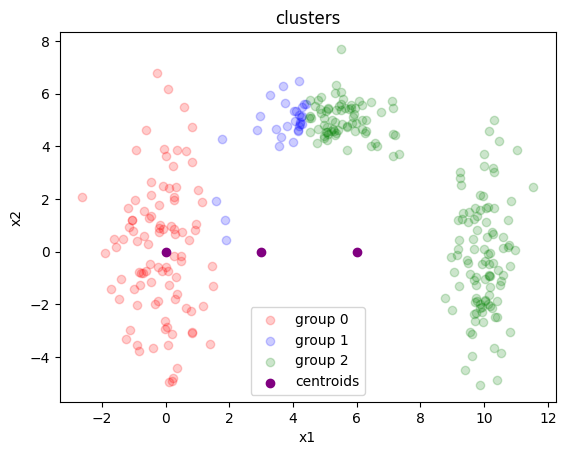

In [ ]:
plt.scatter(data_g0[:,0], data_g0[:,1], color='red', label = 'group 0', alpha = 0.2)
plt.scatter(data_g1[:,0], data_g1[:,1], color='blue', label = 'group 1', alpha = 0.2)
plt.scatter(data_g2[:,0], data_g2[:,1], color='green', label = 'group 2', alpha = 0.2)
plt.scatter(centroids[:,0], centroids[:,1], color='purple', label = 'centroids')
plt.title("clusters")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

Now we need to adjust the centers based on the clustering result

In [ ]:
centroids[0] = np.mean(data_g0, axis=0)
centroids[1] = np.mean(data_g1, axis=0)
centroids[2] = np.mean(data_g2, axis=0)

#for i in range(k):
#  group_idx = np.where(new_assignments == i)[0]
#  data_g = data[group_idx]
#  centroids[i] = np.mean(data_g, axis=0)

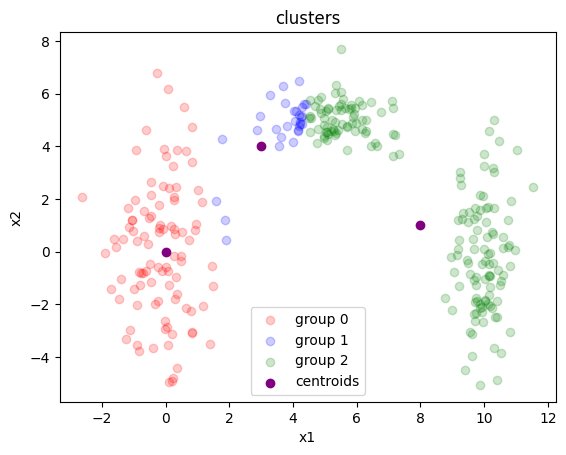

In [ ]:
plt.scatter(data_g0[:,0], data_g0[:,1], color='red', label = 'group 0', alpha = 0.2)
plt.scatter(data_g1[:,0], data_g1[:,1], color='blue', label = 'group 1', alpha = 0.2)
plt.scatter(data_g2[:,0], data_g2[:,1], color='green', label = 'group 2', alpha = 0.2)
plt.scatter(centroids[:,0], centroids[:,1], color='purple', label = 'centroids')
plt.title("clusters")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

Repeat the above steps

In [ ]:
cent_old = centroids ## initialization

In [ ]:
dist = np.zeros([data.shape[0], k])
for i in range(k):
    dist[:,i] = np.linalg.norm(data - cent_old[i], axis=1)

new_assignments = np.argmin(dist, axis=1)

cent_new = np.zeros(centroids.shape)
for i in range(k):
  group_idx = np.where(new_assignments == i)[0]
  data_g = data[group_idx]
  cent_new[i] = np.mean(data_g, axis=0)

print(cent_old)
print(cent_new)

cent_old = cent_new

[[0 0]
 [3 4]
 [8 1]]
[[-1.50750352e-01 -5.11740539e-01]
 [ 4.43889618e+00  5.03078149e+00]
 [ 9.77755616e+00  5.33492971e-03]]


... how many times??? Make a tolerance!

In [ ]:
tolerance = np.linalg.norm(cent_old-cent_new)

while tolerance > 0.01:
  dist = np.zeros([data.shape[0], k])
  for i in range(k):
      dist[:,i] = np.linalg.norm(data - cent_old[i], axis=1)

  new_assignments = np.argmin(dist, axis=1)

  cent_new = np.zeros(centroids.shape)
  for i in range(k):
    group_idx = np.where(new_assignments == i)[0]
    data_g = data[group_idx]
    cent_new[i] = np.mean(data_g, axis=0)
  tolerance = np.linalg.norm(cent_old-cent_new)

  cent_old = cent_new

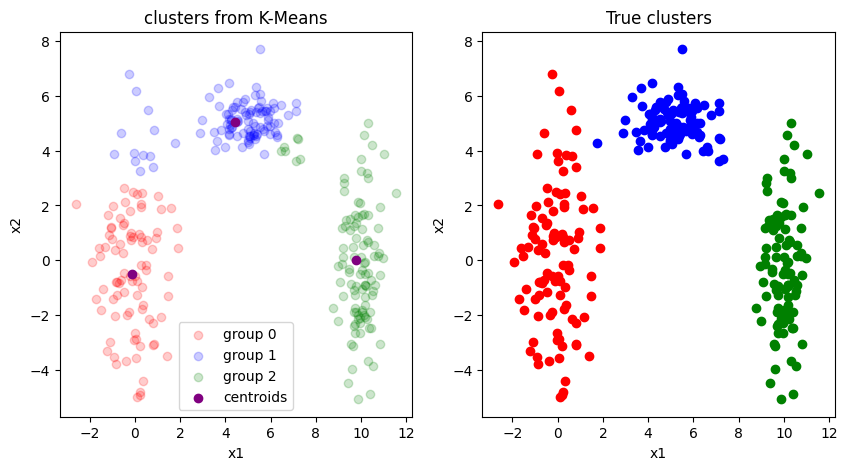

In [ ]:
group0_idx = np.where(new_assignments == 0)[0]
data_g0 = data[group0_idx]
group1_idx = np.where(new_assignments == 1)[0]
data_g1 = data[group1_idx]
group2_idx = np.where(new_assignments == 2)[0]
data_g2 = data[group2_idx]


fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(121)
ax.scatter(data_g0[:,0], data_g0[:,1], color='red', label = 'group 0', alpha = 0.2)
ax.scatter(data_g1[:,0], data_g1[:,1], color='blue', label = 'group 1', alpha = 0.2)
ax.scatter(data_g2[:,0], data_g2[:,1], color='green', label = 'group 2', alpha = 0.2)
ax.scatter(cent_new[:,0], cent_new[:,1], color='purple', label = 'centroids')
ax.set_title("clusters from K-Means")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend()

ax = fig.add_subplot(122)
ax.scatter(data1[:,0], data1[:,1], color='red')
ax.scatter(data2[:,0], data2[:,1], color='blue')
ax.scatter(data3[:,0], data3[:,1], color='green')
ax.set_title("True clusters")
ax.set_xlabel("x1")
ax.set_ylabel("x2")

plt.show()